This notebook shows how to visualize the data and determine which features distinguish Alzheimer's vs healthy EEG. We first plot the power spectrum, and then the cross-spectral density. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from model_functions import load_subject, subject_psd
from config import DATA_PATH, PROCESSED_DATA_PATH

Below I demonstrate how to plot the power spectrum of a single participant. Also the participant numbers in the list [4, 6, 8, 20, 33, 49, 53, 63, 71, 72] are excluded from the analysis and left as the test data. 

In [6]:
excluded = [4, 6, 8, 20, 33, 49, 53, 63, 71, 72]

In [3]:
subject_number = 15
raw = load_subject(subject_number)
spectrum = subject_psd(raw,seg_length=4)
spectrum_array, freqs = spectrum.get_data(return_freqs=True)
spectrum_array = (10**12)*spectrum_array
ch_names = np.array(raw.info.ch_names)
ch_names = ch_names.reshape(-1,1)

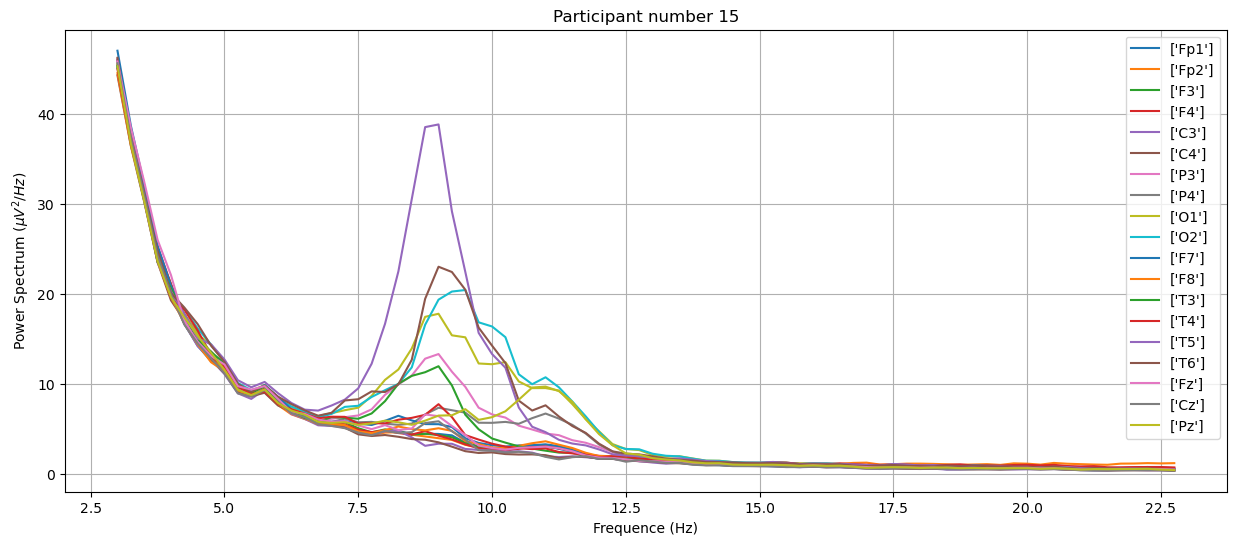

In [8]:
plt.figure(figsize = (15,6))
plt.plot(freqs[10:90], np.transpose(spectrum_array)[10:90, :], label = ch_names)
plt.xlabel('Frequence (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title('Participant number ' + str(subject_number))
plt.grid()
plt.legend()
plt.show()

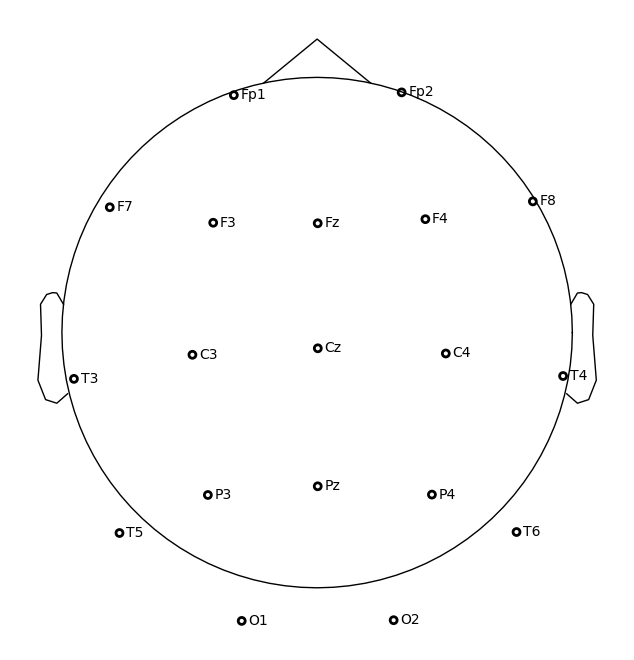

/var/folders/42/2zjv5vys3693nls8j787kc2c0000gn/T/ipykernel_5065/3773339788.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [4]:
fig = mne.viz.plot_sensors(raw.info, show_names = True, ch_groups = ch_names)
fig.show()

Next we plot the power spectrum averaged over all Alzheimer's patients and then over all healthy patients, and then finally for all the people with frontotemporal dementia. This is done to ensure we really pinpoint the distinguishing features which occur in all Alzheimer's patients vs all healthy people. 

## Power Spectrum of people with Alzheimer's

In [7]:
# This just stores the power spectum in a array
spectrum_array_all = []
for i in range(1,37):
    if i in excluded:
        continue
    raw = load_subject(i)
    spectrum = subject_psd(raw,seg_length=4)
    spectrum_array, freqs = spectrum.get_data(return_freqs=True)
    spectrum_array = (10**12)*spectrum_array
    spectrum_array_all += [spectrum_array]
    

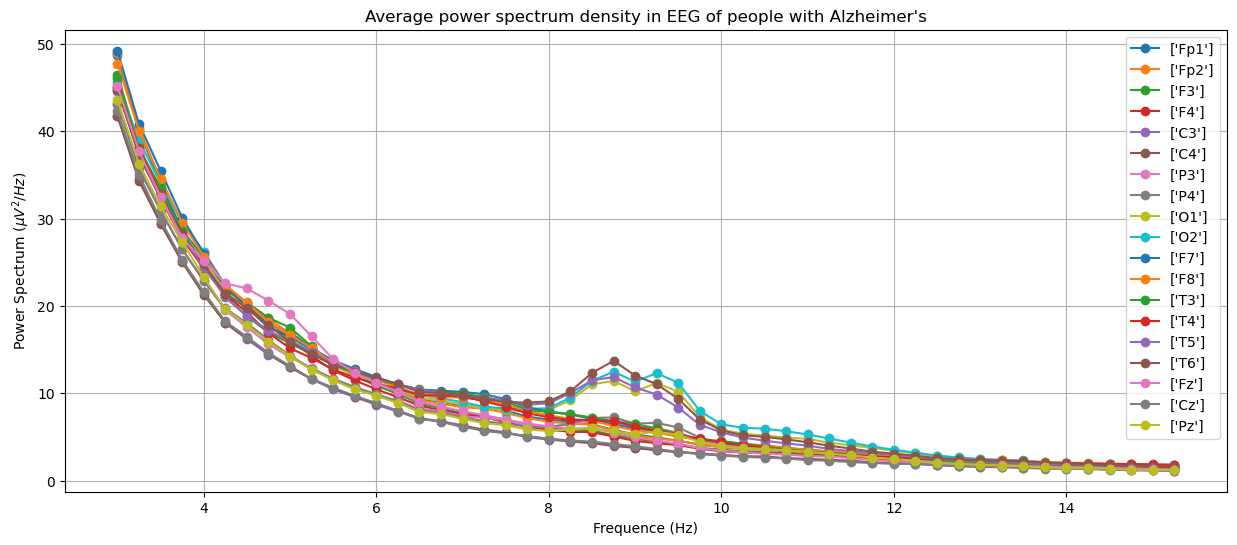

In [9]:
# This plots the averaged power spectrum. 
spectrum_array_avg = np.mean(spectrum_array_all, axis = 0)
plt.figure(figsize = (15,6))
plt.plot(freqs[10:60], np.transpose(spectrum_array_avg)[10:60, :],
        '-o', label = ch_names)
plt.xlabel('Frequence (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title("Average power spectrum density in EEG of people with Alzheimer's")
plt.grid()
plt.legend()
plt.show()
#plt.savefig('../Figures/Alzheimers_psd.png')

## Power Spectrum of  healthy people (MMSE = 30)

In [10]:
spectrum_array_all = []
for i in range(37,66):
    if i in excluded:
        continue
    raw = load_subject(i)
    spectrum = subject_psd(raw,seg_length=4)
    spectrum_array, freqs = spectrum.get_data(return_freqs=True)
    spectrum_array = (10**12)*spectrum_array
    spectrum_array_all += [spectrum_array]

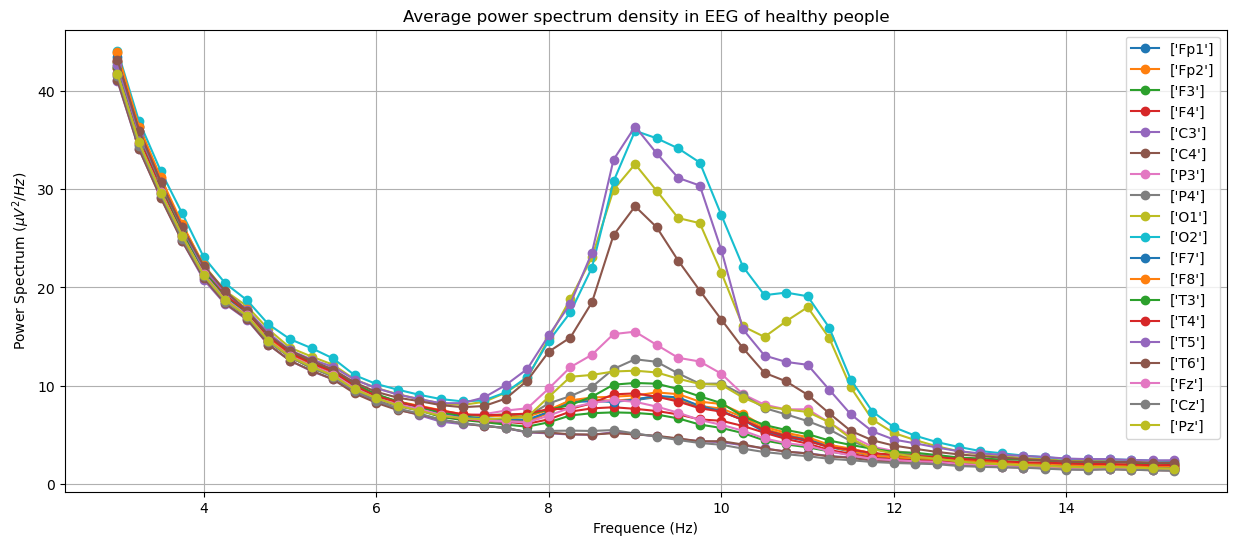

In [11]:
spectrum_array_avg = np.mean(spectrum_array_all, axis = 0)
plt.figure(figsize = (15,6))
plt.plot(freqs[10:60], np.transpose(spectrum_array_avg)[10:60, :],
        '-o', label = ch_names)
plt.xlabel('Frequence (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title("Average power spectrum density in EEG of healthy people")
plt.grid()
plt.legend()
plt.show()
#plt.savefig('../Figures/healthy_control_psd.png')

## Power Spectrum of people with Frontotemporal dementia

In [17]:
spectrum_array_all = []
for i in range(66,89):
    if i in excluded:
        continue
    raw = load_subject(i)
    spectrum = subject_psd(raw,seg_length=4)
    spectrum_array, freqs = spectrum.get_data(return_freqs=True)
    spectrum_array = (10**12)*spectrum_array
    spectrum_array_all += [spectrum_array]

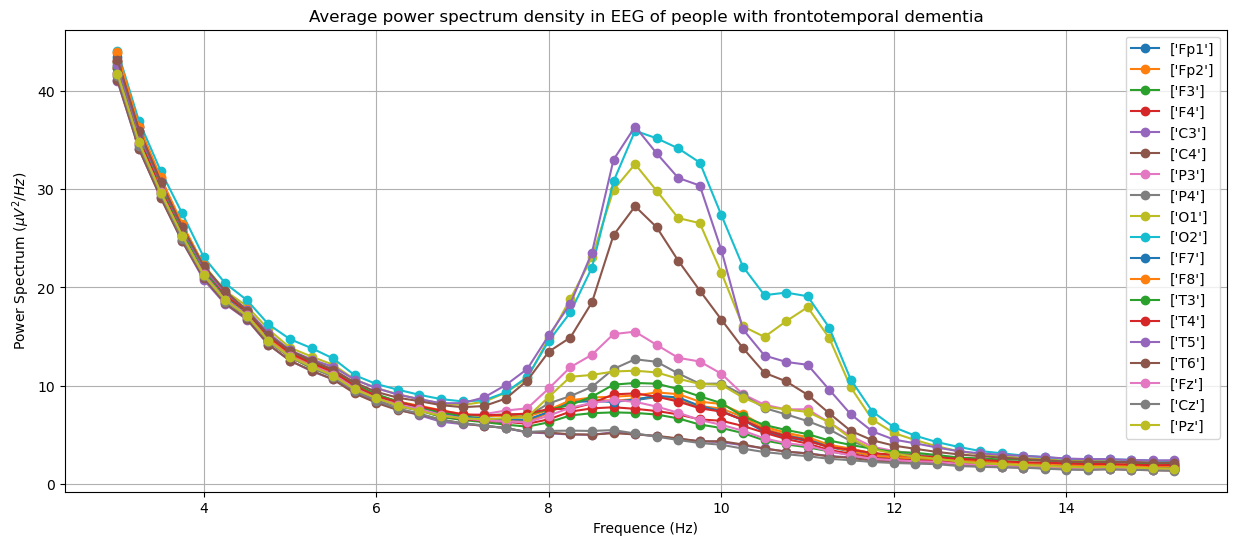

In [12]:
spectrum_array_avg = np.mean(spectrum_array_all, axis = 0)
plt.figure(figsize = (15,6))
plt.plot(freqs[10:60], np.transpose(spectrum_array_avg)[10:60, :],
        '-o', label = ch_names)
plt.xlabel('Frequence (Hz)')
plt.ylabel('Power Spectrum ($\mu V^2 / Hz$)')
plt.title("Average power spectrum density in EEG of people with frontotemporal dementia")
plt.grid()
plt.legend()
plt.show()
#plt.savefig('../Figures/FTD_psd.png')

# Cross-spectral density
We now look at cross-spectral density between different channels to see how that differs between healthy patients and patients with dementia or Alzheimer's. 

Computing cross-spectral density from epochs...


/var/folders/42/2zjv5vys3693nls8j787kc2c0000gn/T/ipykernel_83843/2454328170.py:4: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)


  0%|          | CSD epoch blocks : 0/52 [00:00<?,       ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0

[done]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


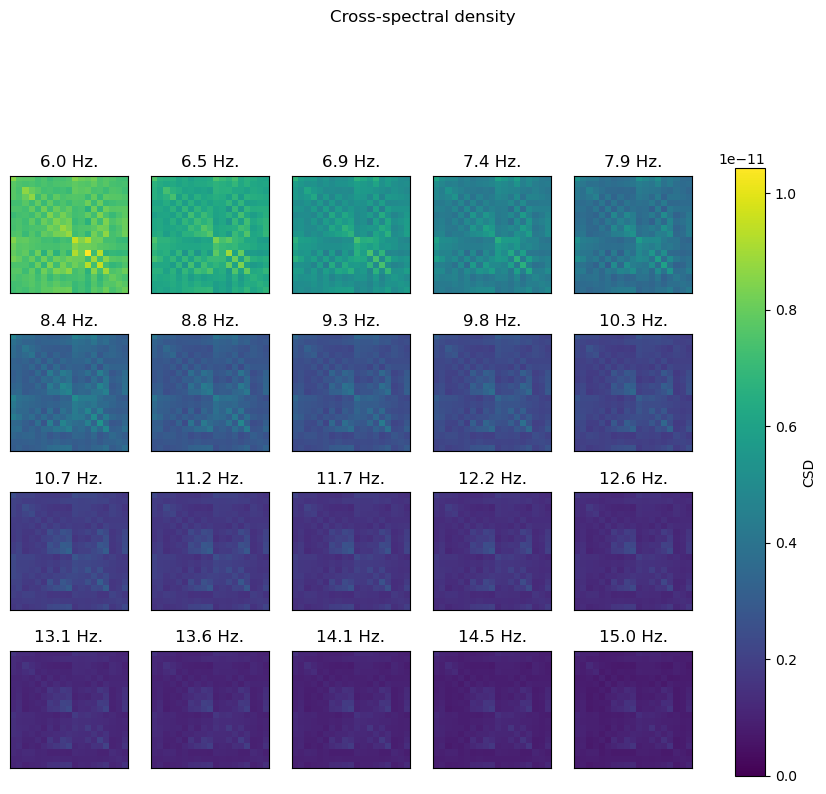

[<Figure size 1100x880 with 21 Axes>]

In [19]:
raw = load_subject(5)
freqs = np.linspace(6,15,20)
epochs = mne.make_fixed_length_epochs(raw,duration=30,preload=True,overlap=15,verbose=False)
csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)
csd_channels.plot()

Computing cross-spectral density from epochs...


/var/folders/42/2zjv5vys3693nls8j787kc2c0000gn/T/ipykernel_83843/2910554725.py:4: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)


  0%|          | CSD epoch blocks : 0/52 [00:00<?,       ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0

[done]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


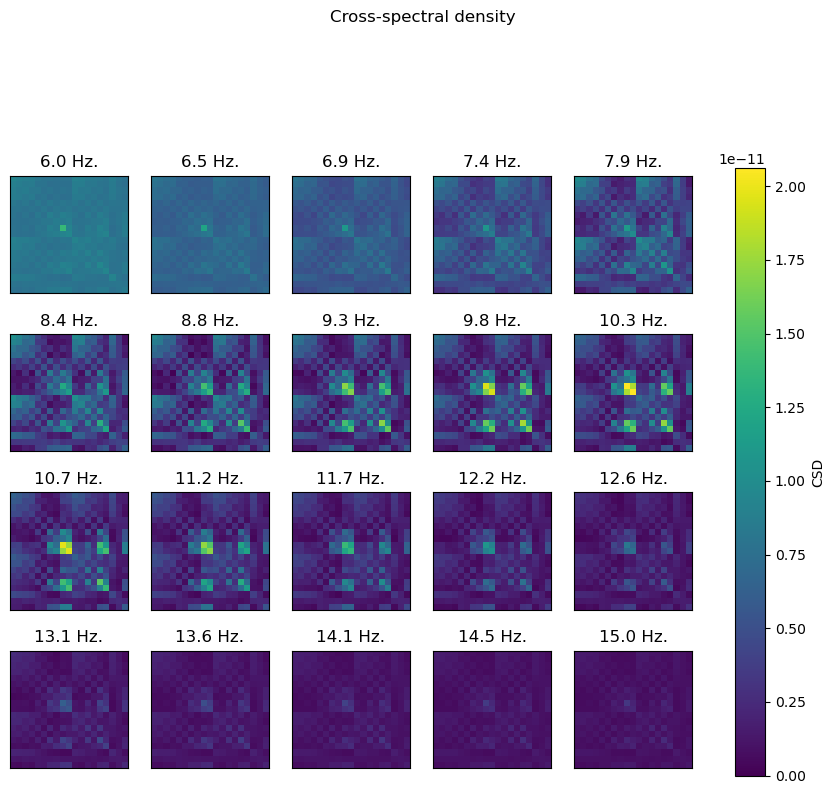

[<Figure size 1100x880 with 21 Axes>]

In [20]:
raw = load_subject(47)
freqs = np.linspace(6,15,20)
epochs = mne.make_fixed_length_epochs(raw,duration=30,preload=True,overlap=15,verbose=False)
csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)
csd_channels.plot()

Computing cross-spectral density from epochs...


/var/folders/42/2zjv5vys3693nls8j787kc2c0000gn/T/ipykernel_83843/770826251.py:4: RuntimeWarning: Epochs are not baseline corrected or enough highpass filtered. Cross-spectral density may be inaccurate.
  csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)


  0%|          | CSD epoch blocks : 0/53 [00:00<?,       ?it/s]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0

[done]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


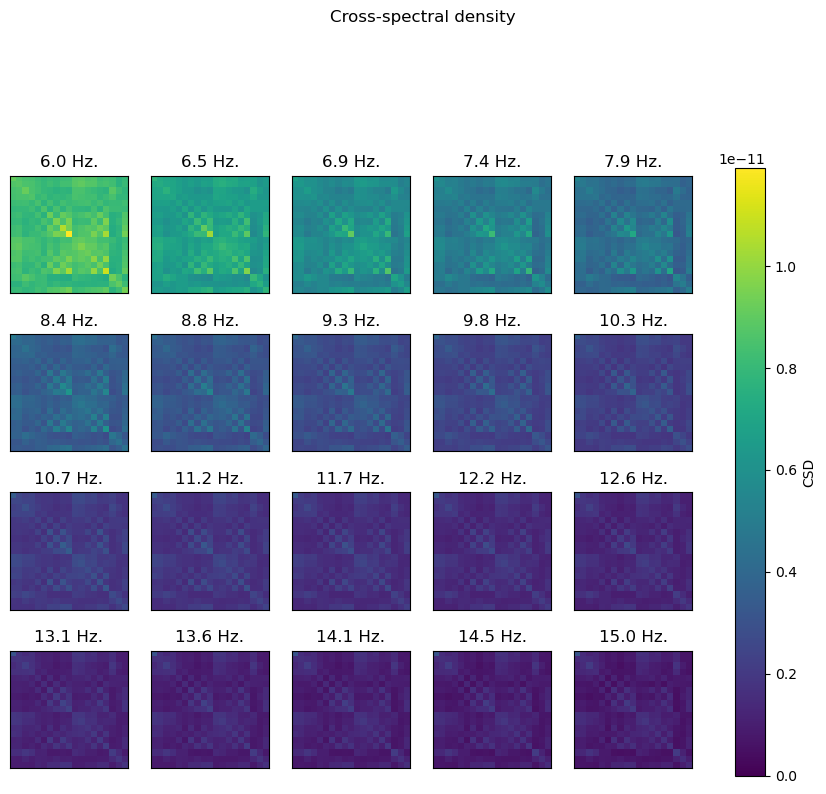

[<Figure size 1100x880 with 21 Axes>]

In [21]:
raw = load_subject(76)
freqs = np.linspace(6,15,20)
epochs = mne.make_fixed_length_epochs(raw,duration=30,preload=True,overlap=15,verbose=False)
csd_channels = mne.time_frequency.csd_morlet(epochs, frequencies = freqs)
csd_channels.plot()